# Introduction - Deep Learning

Classical programming is all about creating a function that helps us to process input data and get the desired output.

In the learning paradigm, we change the process so that given a set of examples of input data and desired output, we aim to learn the function that can process the data.

- In machine learning, we end up handcrafting the features and then learn the function to get the desired output
- In deep learning, we want to both learn the features and the function together to get the desired output

![Learning Paradigm](../Slides/img/learning_paradigm.png)

# Theory of Deep Learning

We will start with why deep learning works and explain the basis of Universal Approximation

Let us take a non-linear function - a saddle function

$$ Z = 2X^2 - 3Y^2  + 1 + \epsilon $$

## Problem: A Noisy Function

In [3]:
import sys
sys.path.append("../")

In [5]:
# DL & Numerical Library
import numpy as np
import keras

# Visualisation Library & Helpers
import matplotlib.pyplot as plt
%matplotlib inline
from reco import vis

In [6]:
x = np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)

In [7]:
X, Y = np.meshgrid(x, y)
c = np.ones((200,200))
e = np.random.rand(200,200)*0.1

In [8]:
Z = 2*X*X - 3*Y*Y + 5*c + e

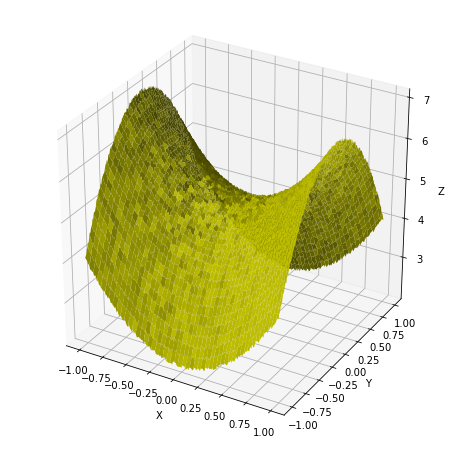

In [9]:
vis.plot3d(X,Y,Z)

## Using Neural Network

### Step 0: Load the Keras Model

In [10]:
from keras.models import Sequential
from keras.layers import Dense

### Step 1: Create the input and output

In [11]:
input_xy = np.c_[X.reshape(-1),Y.reshape(-1)]
output_z = Z.reshape(-1)

In [12]:
output_z.shape, input_xy.shape

((40000,), (40000, 2))

### Step 2: Create the Transformation & Prediction Model

In [18]:
model = Sequential()
model.add(Dense(64, input_dim=2,  activation="relu"))
model.add(Dense(32, input_dim=2,  activation="relu"))
model.add(Dense(1))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


### Step 3: Compile the Model - Loss, Optimizer and Fit the Model

In [20]:
model.compile(loss='mean_squared_error', optimizer="sgd", metrics=["mse"])

In [26]:
%%time
output = model.fit(input_xy, output_z, epochs=10, validation_split=0.2, shuffle=True, verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 2s 51us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.3291 - val_mean_squared_error: 0.3291
Epoch 2/10
32000/32000 [==============================] - 2s 53us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.3295 - val_mean_squared_error: 0.3295
Epoch 3/10
32000/32000 [==============================] - 2s 51us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.3299 - val_mean_squared_error: 0.3299
Epoch 4/10
32000/32000 [==============================] - 2s 60us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.3275 - val_mean_squared_error: 0.3275
Epoch 5/10
32000/32000 [==============================] - 2s 64us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.3198 - val_mean_squared_error: 0.3198
Epoch 6/10
32000/32000 [==============================] - 2s 62us/step - loss: 0.0010 - mean_squared_error: 0.0010 -

### Step 4: Evaluate Model Performance

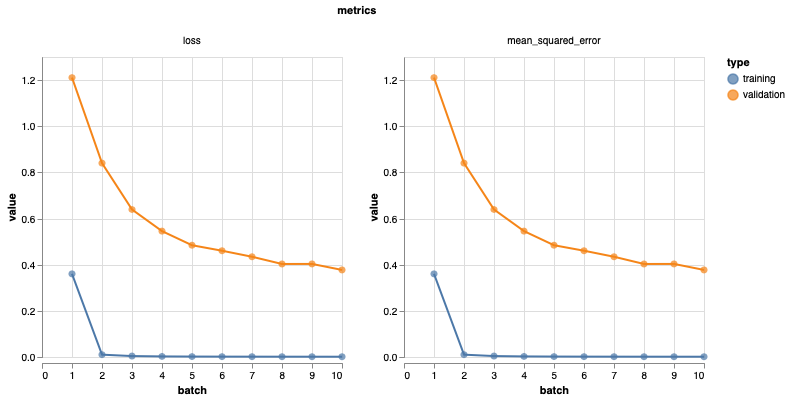

In [22]:
vis.metrics(output.history)

### Step 5: Make Prediction from the model

In [23]:
Z_pred = model.predict(input_xy).reshape(200,200)

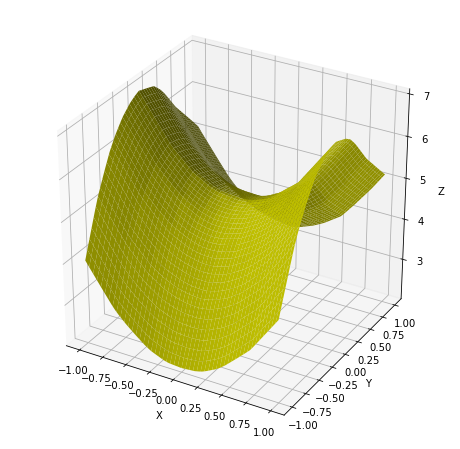

In [24]:
vis.plot3d(X,Y,Z_pred)

## Experimentation / Questions

- Try changing the activation to a "linear" and see whether you can predict the function or not 
- Try adding more layers to the network
- Try changing the number of layers in the network